# Filling(Imputing) or Disregarding missing values

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")

In [2]:
cars = pd.read_csv("car-sales-extended-missing-data.csv")
cars.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0


In [3]:
cars.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [4]:
import missingno

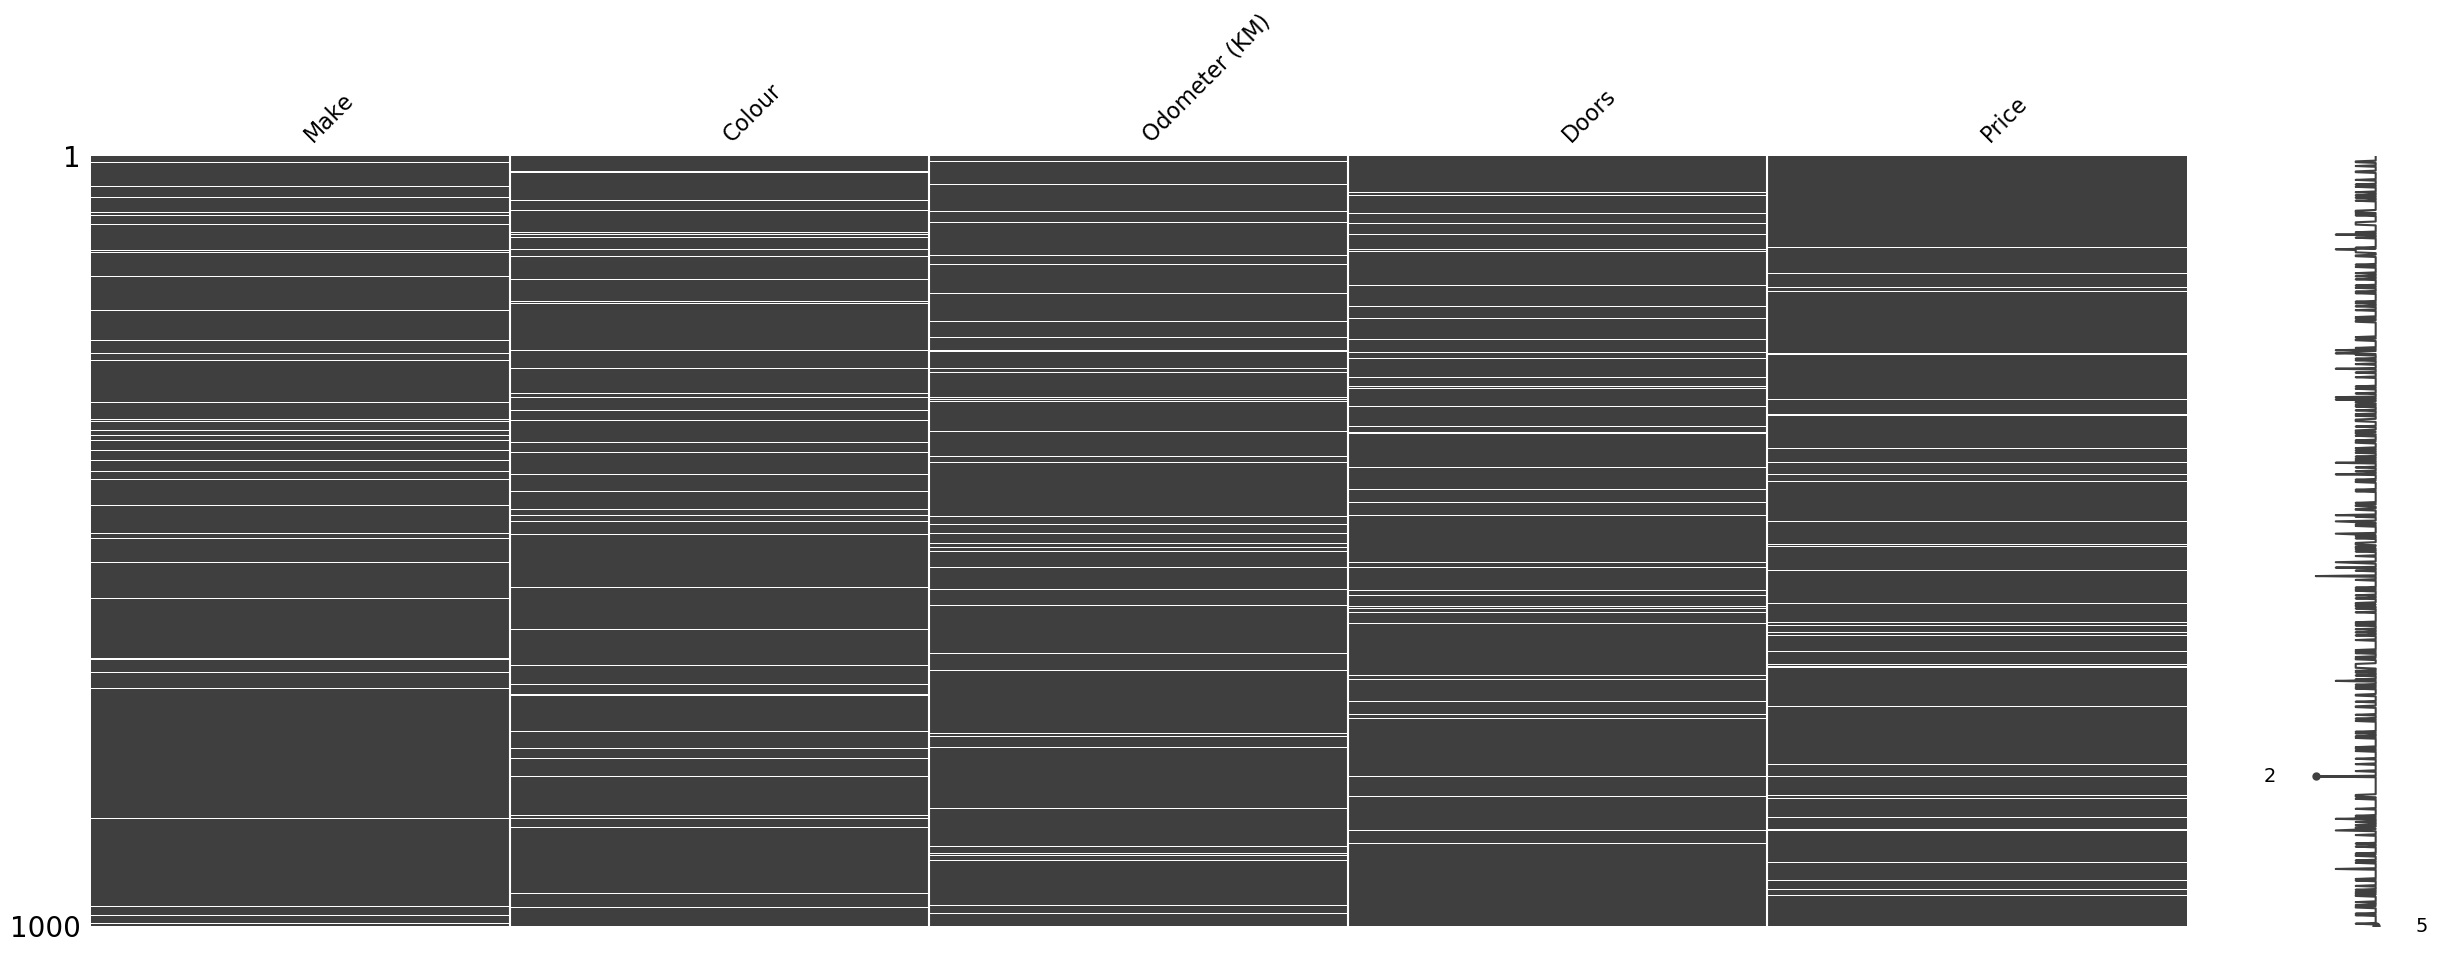

In [7]:
missingno.matrix(cars, figsize = (30,10));

Before converting our object columns into numeric value, we have to deal with the missing data

### Option 1: Fill missing data with Pandas

In [10]:
cars.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


In [9]:
cars.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [11]:
# fill Make column
cars["Make"].fillna("missing", inplace=True)

# fill Colour column
cars["Colour"].fillna("missing", inplace=True)

# fill Odometer (KM) column with mean value
cars["Odometer (KM)"].fillna(cars["Odometer (KM)"].mean(), inplace=True)

In [12]:
cars.Doors.value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [13]:
# fill Doors column with the maximum occurence
cars["Doors"].fillna(4, inplace=True)

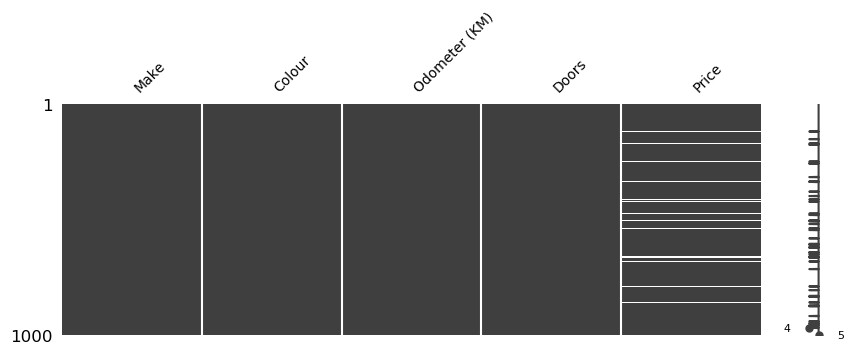

In [16]:
missingno.matrix(cars, figsize = (10,3), fontsize=10);

##### The `Price` column is special because it's our target column. So we'll disregard the rows with missing price values

In [17]:
cars.dropna(inplace=True)

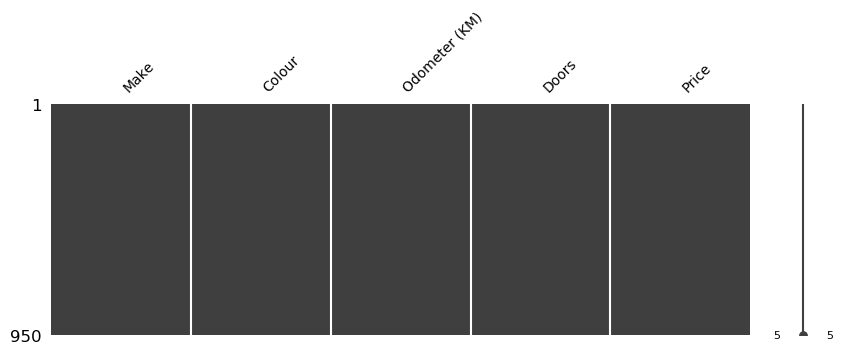

In [18]:
missingno.matrix(cars, figsize = (10,3), fontsize=10);

In [19]:
X = cars.drop("Price", axis=1)
y = cars["Price"]

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [23]:
categorical_features = ["Make", "Colour", "Doors"]

In [25]:
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(cars)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with scikit-learn

In [26]:
cars = pd.read_csv("car-sales-extended-missing-data.csv")
cars.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0


In [27]:
cars.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

##### Dropping the rows with missing value of `Price`

In [28]:
cars.dropna(subset=["Price"], inplace=True)
cars.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

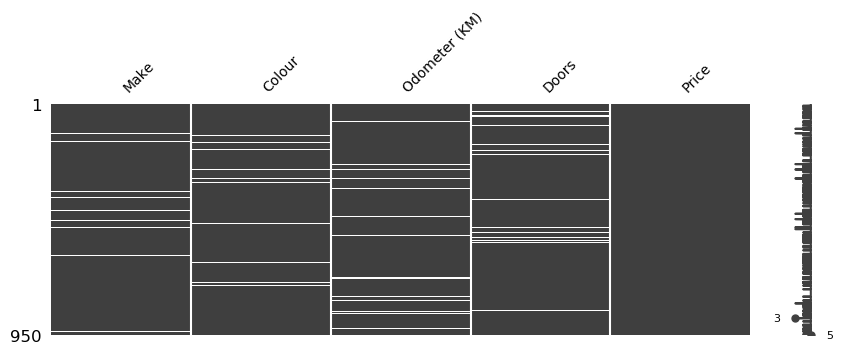

In [29]:
missingno.matrix(cars, figsize = (10,3), fontsize=10);

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [32]:
# Fill categorical values with 'missing' & numerical values with mean
car_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
car_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

In [33]:
# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([("cat_imputer", car_imputer, car_features),
                             ("door_imputer", door_imputer, door_feature),
                             ("num_imputer", num_imputer, num_features)])

In [35]:
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [36]:
cars_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
cars_filled.head(3)

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714


In [37]:
cars_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(cars_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [45]:
transformed_X.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [46]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, random_state=0, test_size=0.2)
# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.14337196037595656